# Imports

In [1]:
# Common imports
import numpy as np
from pprint import pprint

# to make this notebook's output stable across runs
np.random.seed(42)

#sklearn specific imports
# Dataset fetching
from sklearn.datasets import fetch_openml

# Feature scaling
from sklearn.preprocessing import StandardScaler

# Pipeline utility
from sklearn.pipeline import Pipeline

# Classifiers: logistic regression (LogisticRegression)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# global settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure',figsize=(8,6))

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy ()
y = y.to_numpy ()
x_train, x_test, y_train, y_test= X[:60000], X[60000: ], y[: 60000], y[ 60000:]

# Model Building

In [8]:
pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(multi_class="multinomial", solver="sag")),
    ]
)

pipe.fit(x_train, y_train)

c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [9]:
pipe[-1].coef_.shape

(10, 784)

In [10]:
pipe[-1].intercept_.shape

(10,)

In [11]:
pipe[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

# Model Evaluation

In [12]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



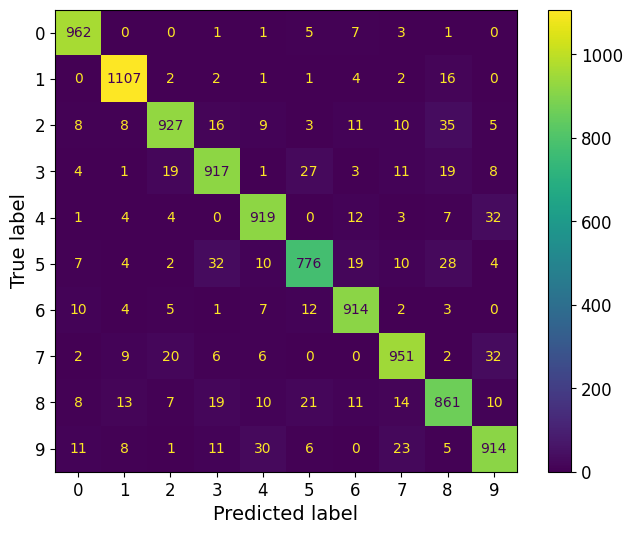

In [13]:
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test)
plt.show()

# Using `LogisticRegressionCV`

In [17]:
# I AM NOT ABLE TO COMPUTE THIS DUE TO LESS COMPUTER POWER.

from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

scorer = make_scorer(f1_score, average="micro")
pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegressionCV(
                cv=5,
                multi_class="multinomial",
                solver="sag",
                scoring=scorer,
                max_iter=100,
                random_state=1729,
            ),
        ),
    ]
)
pipe.fit(x_train, y_train)

c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [6]:
pipe[-1].C_

AttributeError: 'LogisticRegression' object has no attribute 'C_'

In [ ]:
pipe[-1].l1_ratio

In [ ]:
print(classification_report(y_test, pipe.predict(x_test)))

In [ ]:
ConfusionMatrixDisplay.from_estimator (pipe, x_test, y_test)
plt.show()